In this file I attempt to find respecting record in ACMS (input) dataset for each report in output dataset

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

In [119]:
acms = pd.read_csv('./a320_a321_neo_full_acms_parameters.csv', parse_dates=['reportts']) \
    .drop(columns=['processedts', 'file_path'])

acnum = 'VQ-BDQ'
takeoff_reportname = 'A320 ENGINE TAKE OFF REPORT'
pos = 1

acms = acms[(acms['acnum'] == acnum) & (acms['reportname'] == takeoff_reportname) & (acms['pos'] == pos)] \
    .drop(columns=['reportname']) \
    .set_index('reportts') \
    .sort_index()

acms

/home/b.korzh@group.s7/miniconda3/envs/recsys/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (152,154,172,173,176,177,178) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,acnum,pos,fltdes,dep,arr,pf,wai,nai,prv,hpv,...,tol,tr,ttp,vb1,vb2,vorrc,vorv,votm,vsva,w14
reportts,,,,,,,,,,,,,,,,,,,,,
2018-05-20 02:58:38,VQ-BDQ,1,773,UIII,UUDD,0.42,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-20 19:36:46,VQ-BDQ,1,171,UUDD,UNEE,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,36.0,0.2,0.2,69.4,NaN,NaN,0.785,1150.0
2018-05-22 01:48:49,VQ-BDQ,1,174,UNNT,UUDD,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,58.0,0.2,0.3,74.0,NaN,NaN,0.779,1100.0
2018-05-23 19:51:22,VQ-BDQ,1,171,UUDD,UNEE,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,35.0,0.2,0.4,68.3,NaN,NaN,0.782,1139.0
2018-05-25 01:07:04,VQ-BDQ,1,812,UNTT,UUDD,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,41.0,0.2,0.4,63.4,NaN,NaN,0.782,1182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-20 00:51:22,VQ-BDQ,1,2594,UNAA,UUDD,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,35.0,0.1,0.3,54.1,NaN,NaN,0.773,1184.0
2025-04-20 08:53:20,VQ-BDQ,1,3211,UUDD,LUKK,0.43,0.0,1.0,1.0,0.0,...,NaN,NaN,63.0,0.1,0.2,55.4,NaN,NaN,0.772,1136.0
2025-04-20 12:55:21,VQ-BDQ,1,3212,LUKK,UUDD,0.45,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
egtm_raw = pd.read_csv('./EGTM.csv', parse_dates=['RECORDED_DT']) \
    .drop(columns=['ESN']) \
    .rename(columns={
        'AIRCRAFT': 'acnum',
        'POSITION': 'pos',
        'RECORDED_DT': 'recorded_dt',
        'RWCTOMAR': 'egtm'
    }) \
    .loc[:, :'egtm']

egtm_raw['recorded_dt'] = pd.to_datetime(egtm_raw['recorded_dt'])

egtm = egtm_raw[(egtm_raw['pos'] == 1) & (egtm_raw['acnum'] == acnum)] \
    .set_index('recorded_dt') \
    .sort_index()

egtm

,acnum,pos,egtm
recorded_dt,,,
2018-01-06 22:12:00,VQ-BDQ,1,126.455
2018-01-07 08:26:00,VQ-BDQ,1,123.271
2018-01-07 13:56:00,VQ-BDQ,1,123.259
2018-01-07 19:40:00,VQ-BDQ,1,123.219
2018-01-08 03:01:00,VQ-BDQ,1,120.701
...,...,...,...
2020-11-01 05:46:00,VQ-BDQ,1,106.876
2020-11-01 21:33:00,VQ-BDQ,1,106.917
2020-12-01 00:02:00,VQ-BDQ,1,107.026


In [121]:
acms

,acnum,pos,fltdes,dep,arr,pf,wai,nai,prv,hpv,...,tol,tr,ttp,vb1,vb2,vorrc,vorv,votm,vsva,w14
reportts,,,,,,,,,,,,,,,,,,,,,
2018-05-20 02:58:38,VQ-BDQ,1,773,UIII,UUDD,0.42,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-20 19:36:46,VQ-BDQ,1,171,UUDD,UNEE,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,36.0,0.2,0.2,69.4,NaN,NaN,0.785,1150.0
2018-05-22 01:48:49,VQ-BDQ,1,174,UNNT,UUDD,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,58.0,0.2,0.3,74.0,NaN,NaN,0.779,1100.0
2018-05-23 19:51:22,VQ-BDQ,1,171,UUDD,UNEE,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,35.0,0.2,0.4,68.3,NaN,NaN,0.782,1139.0
2018-05-25 01:07:04,VQ-BDQ,1,812,UNTT,UUDD,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,41.0,0.2,0.4,63.4,NaN,NaN,0.782,1182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-20 00:51:22,VQ-BDQ,1,2594,UNAA,UUDD,0.43,0.0,0.0,1.0,0.0,...,NaN,NaN,35.0,0.1,0.3,54.1,NaN,NaN,0.773,1184.0
2025-04-20 08:53:20,VQ-BDQ,1,3211,UUDD,LUKK,0.43,0.0,1.0,1.0,0.0,...,NaN,NaN,63.0,0.1,0.2,55.4,NaN,NaN,0.772,1136.0
2025-04-20 12:55:21,VQ-BDQ,1,3212,LUKK,UUDD,0.45,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


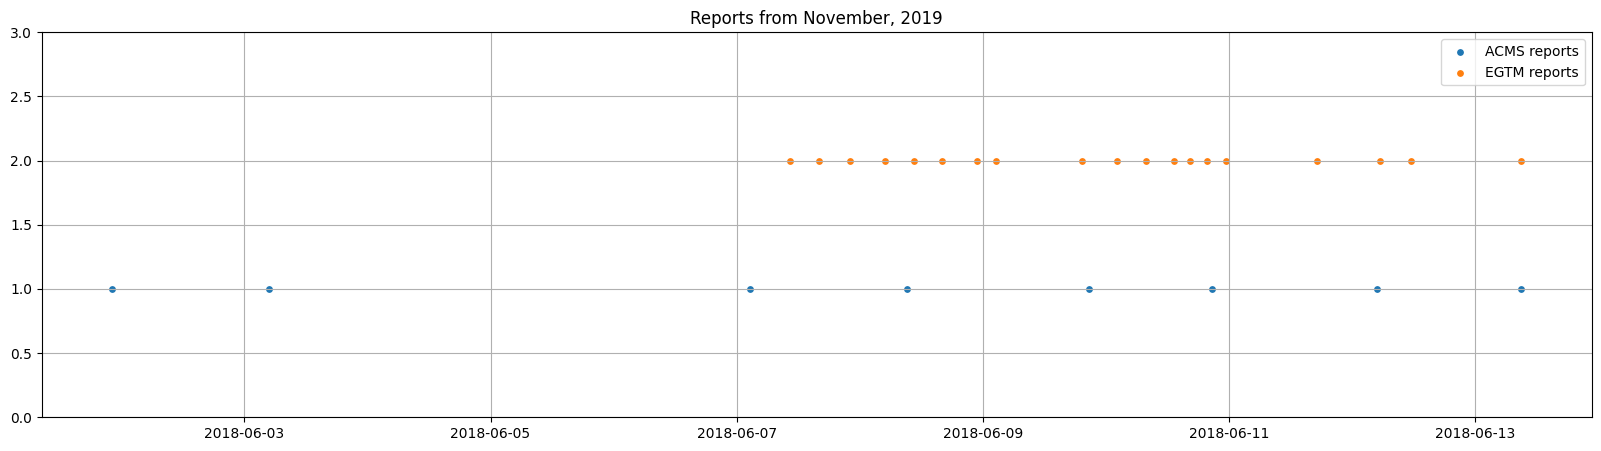

In [122]:
acms_line = acms[
    (pd.to_datetime(acms.index).year == 2018) & 
    (pd.to_datetime(acms.index).month == 6) &
    (pd.to_datetime(acms.index).day <= 13)
].index

egtm_line = egtm[
    (pd.to_datetime(egtm.index).year == 2018) & 
    (pd.to_datetime(egtm.index).month == 6) & 
    (pd.to_datetime(egtm.index).day <= 13)
].index

fig, ax = plt.subplots(figsize=(20, 5))

ax.scatter(acms_line, y=acms_line.map(lambda _ : 1), s=15)
ax.scatter(egtm_line, y=egtm_line.map(lambda _: 2), s=15)
ax.legend(["ACMS reports", "EGTM reports"])
ax.set_ylim([0, 3])
ax.set_title("Reports from November, 2019")
ax.grid()
plt.show()

Гипотеза: output параметры вычислялись вскоре после записи input параметров 

In [125]:
def merge_by_date(left: pd.DataFrame, right: pd.DataFrame):
  left.sort_values('reportts', inplace=True)
  right.sort_values('reportts', inplace=True)
  right['reportts_'] = right['reportts'] 

  left = left.set_index('reportts')
  right = right.set_index('reportts').drop_duplicates()

  right_indexed = \
      right.reindex(left.index, method='ffill').reset_index()
  return pd.merge(left, right_indexed, on=['reportts', 'acnum', 'pos'], suffixes=(None, '_'))

merged = merge_by_date( 
  egtm.reset_index().rename(columns={'recorded_dt': 'reportts'}),
  acms.reset_index()
)

diff = (merged['reportts'] - merged['reportts_']) \
        .astype('timedelta64[s]').astype('int')

merged_sample = merged[diff < 100]


/home/b.korzh@group.s7/miniconda3/envs/recsys/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1122: RuntimeWarning: invalid value encountered in cast
  if not (rk == rk.astype(lk.dtype))[~np.isnan(rk)].all():


In [126]:
merged_sample

,reportts,acnum,pos,egtm,fltdes,dep,arr,pf,wai,nai,...,tr,ttp,vb1,vb2,vorrc,vorv,votm,vsva,w14,reportts_
0,2018-05-20 19:36:47,VQ-BDQ,1,132.144,171.0,UUDD,UNEE,0.43,0.0,0.0,...,NaN,36.0,0.2,0.2,69.4,NaN,NaN,0.785,1150.0,2018-05-20 19:36:46
1,2018-05-22 01:48:50,VQ-BDQ,1,127.592,174.0,UNNT,UUDD,0.43,0.0,0.0,...,NaN,58.0,0.2,0.3,74.0,NaN,NaN,0.779,1100.0,2018-05-22 01:48:49
2,2018-05-23 19:51:23,VQ-BDQ,1,128.712,171.0,UUDD,UNEE,0.43,0.0,0.0,...,NaN,35.0,0.2,0.4,68.3,NaN,NaN,0.782,1139.0,2018-05-23 19:51:22
3,2018-05-25 01:07:05,VQ-BDQ,1,129.118,812.0,UNTT,UUDD,0.43,0.0,0.0,...,NaN,41.0,0.2,0.4,63.4,NaN,NaN,0.782,1182.0,2018-05-25 01:07:04
4,2018-05-26 10:41:08,VQ-BDQ,1,129.008,3340.0,ULLI,UNNT,0.45,0.0,0.0,...,NaN,45.0,0.2,0.3,68.2,NaN,NaN,0.788,1150.0,2018-05-26 10:41:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,2019-12-18 01:39:13,VQ-BDQ,1,110.861,6281.0,UHWW,RJAA,0.03,0.0,0.0,...,NaN,39.0,0.1,0.3,57.1,NaN,NaN,0.778,1166.0,2019-12-18 01:38:55
1105,2019-12-18 05:04:53,VQ-BDQ,1,110.643,6282.0,RJAA,UHWW,0.03,0.0,0.0,...,NaN,42.0,0.1,0.5,56.6,NaN,NaN,0.775,1078.0,2019-12-18 05:04:52
1106,2019-12-18 17:26:40,VQ-BDQ,1,110.586,6215.0,UHWW,UHPP,0.03,0.0,0.0,...,NaN,46.0,0.1,0.4,56.8,NaN,NaN,0.768,1194.0,2019-12-18 17:26:39
1107,2019-12-18 22:28:58,VQ-BDQ,1,110.581,6216.0,UHPP,UHWW,0.03,0.0,0.0,...,NaN,NaN,0.3,0.5,52.2,NaN,NaN,0.779,1228.0,2019-12-18 22:28:57


In [128]:
merged_sample.drop(columns=['reportts_']).to_csv('./small-sample.csv', index=False)